In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw=pd.read_csv(r"C:\Users\USER\Desktop\vehicle\vehicle_registrations_500k.csv")
df_agg=pd.read_csv(r"C:\Users\USER\Desktop\vehicle\state_month_fuel_aggregated.csv")

df_agg contains aggregated monthly data for trend analysis,
df_raw contains detailed vehicle-level data for deep insights
Using both datasets allows macro + micro level analysis,

In [3]:
df_raw

,registrationYear,financialYear,registrationMonthMMYY,makerName,stateName,rtoCode,rtoName,vehicleCategoryName,vehicleModelName,fuelName,vehicleClassName,grossVehicleWeight,pollutionNorm,saleType,vehicleCount
0,2023,2022-2023,03-23,HYUNDAI MOTOR INDIA LTD,Punjab,PB19,RTO BARNALA,LIGHT MOTOR VEHICLE,CRETA 1.5 CRDI MT EX,DIESEL,Motor Car,1765,BHARAT STAGE VI,Resale,1
1,2022,2021-2022,03-22,TVS MOTOR COMPANY LTD,Odisha,OR26,NUAPADA RTO,TWO WHEELER(NT),TVS RADEON,PETROL,M-Cycle/Scooter,246,BHARAT STAGE VI,New,3
2,2020,2020-2021,12-20,TOYOTA KIRLOSKAR MOTOR PVT LTD,Karnataka,KA63,DHARWAD EAST RTO,LIGHT MOTOR VEHICLE,TOYOTA URBAN CRUISER (HIGH MT),PETROL,Motor Car,1600,BHARAT STAGE VI,New,2
3,2022,2022-2023,09-22,MARUTI SUZUKI INDIA LTD,Chhattisgarh,CG14,Jashpur DTO,LIGHT MOTOR VEHICLE,SWIFT LXI,PETROL,Motor Car,1335,BHARAT STAGE VI,New,1
4,2023,2023-2024,09-23,TATA MOTORS PASSENGER VEHICLES LTD,Karnataka,KA51,ELECTRONIC CITY RTO,LIGHT MOTOR VEHICLE,HARRIER XZ+ 2LBS6PH2 #DRK,DIESEL,Motor Car,2200,BHARAT STAGE VI,New,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2025,2025-2026,07-25,TOYOTA KIRLOSKAR MOTOR PVT LTD,Maharashtra,MH04,THANE,LIGHT MOTOR VEHICLE,TOYOTA GLANZA G PETROL [MT],PETROL(E20),Motor Car,1410,BHARAT STAGE VI,New,1
499996,2023,2022-2023,02-23,MARUTI SUZUKI INDIA LTD,Maharashtra,MH45,AKLUJ,LIGHT MOTOR VEHICLE,DZIRE ZXI,PETROL,Motor Car,1335,BHARAT STAGE VI,New,1
499997,2024,2024-2025,07-24,ROYAL-ENFIELD (UNIT OF EICHER LTD),Tamil Nadu,TN51,GUDIYATHAM UO,TWO WHEELER(NT),HUNTER 350,PETROL,M-Cycle/Scooter,360,BHARAT STAGE VI,New,3
499998,2021,2020-2021,02-21,MAHINDRA & MAHINDRA LIMITED,Tamil Nadu,TN56,PERUNDURAI RTO,LIGHT MOTOR VEHICLE,MAHINDRA BOLERO B6 (O) BS-VI,DIESEL,Motor Car,2220,BHARAT STAGE VI,Resale,1


In [4]:
df_agg

,stateName,registrationMonthMMYY,fuelName,vehicleCount
0,Andaman & Nicobar Island,01-21,PETROL,25
1,Andaman & Nicobar Island,01-22,PETROL,6
2,Andaman & Nicobar Island,01-23,DIESEL,1
3,Andaman & Nicobar Island,01-23,PETROL,17
4,Andaman & Nicobar Island,01-24,PETROL,4
...,...,...,...,...
13265,West Bengal,12-25,PETROL(E20)/CNG,13
13266,West Bengal,12-25,PETROL/CNG,1
13267,West Bengal,12-25,PETROL/HYBRID,2
13268,West Bengal,12-25,PURE EV,21


In [5]:
df_agg.head()
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13270 entries, 0 to 13269
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   stateName              13270 non-null  object
 1   registrationMonthMMYY  13270 non-null  object
 2   fuelName               13270 non-null  object
 3   vehicleCount           13270 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 414.8+ KB


In [6]:
df_raw.head()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   registrationYear       500000 non-null  int64 
 1   financialYear          500000 non-null  object
 2   registrationMonthMMYY  500000 non-null  object
 3   makerName              500000 non-null  object
 4   stateName              500000 non-null  object
 5   rtoCode                500000 non-null  object
 6   rtoName                500000 non-null  object
 7   vehicleCategoryName    500000 non-null  object
 8   vehicleModelName       499994 non-null  object
 9   fuelName               500000 non-null  object
 10  vehicleClassName       500000 non-null  object
 11  grossVehicleWeight     500000 non-null  int64 
 12  pollutionNorm          500000 non-null  object
 13  saleType               500000 non-null  object
 14  vehicleCount           500000 non-null  int64 
dtype

In [7]:
df_agg.describe()

,vehicleCount
count,13270.000000
mean,211.511379
std,612.513487
min,1.000000
25%,5.000000
50%,21.000000
75%,101.000000
max,10288.000000


In [8]:
df_raw.describe()

,registrationYear,grossVehicleWeight,vehicleCount
count,500000.000000,500000.000000,500000.000000
mean,2022.823424,1696.285062,5.613512
std,10.137112,3861.624052,23.520600
min,2020.000000,0.000000,1.000000
25%,2022.000000,271.000000,1.000000
50%,2023.000000,1185.000000,1.000000
75%,2024.000000,1740.000000,3.000000
max,9100.000000,108000.000000,2078.000000


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   registrationYear       500000 non-null  int64 
 1   financialYear          500000 non-null  object
 2   registrationMonthMMYY  500000 non-null  object
 3   makerName              500000 non-null  object
 4   stateName              500000 non-null  object
 5   rtoCode                500000 non-null  object
 6   rtoName                500000 non-null  object
 7   vehicleCategoryName    500000 non-null  object
 8   vehicleModelName       499994 non-null  object
 9   fuelName               500000 non-null  object
 10  vehicleClassName       500000 non-null  object
 11  grossVehicleWeight     500000 non-null  int64 
 12  pollutionNorm          500000 non-null  object
 13  saleType               500000 non-null  object
 14  vehicleCount           500000 non-null  int64 
dtype

In [10]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13270 entries, 0 to 13269
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   stateName              13270 non-null  object
 1   registrationMonthMMYY  13270 non-null  object
 2   fuelName               13270 non-null  object
 3   vehicleCount           13270 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 414.8+ KB


In [11]:
#Convert Month Column to Date

df_agg['registrationMonth'] = pd.to_datetime(
    df_agg['registrationMonthMMYY'], format='%m-%y'
)


In [12]:
df_agg.isnull().sum()

stateName                0
registrationMonthMMYY    0
fuelName                 0
vehicleCount             0
registrationMonth        0
dtype: int64

In [13]:
df_raw.isnull().sum()


registrationYear         0
financialYear            0
registrationMonthMMYY    0
makerName                0
stateName                0
rtoCode                  0
rtoName                  0
vehicleCategoryName      0
vehicleModelName         6
fuelName                 0
vehicleClassName         0
grossVehicleWeight       0
pollutionNorm            0
saleType                 0
vehicleCount             0
dtype: int64

In [14]:
#Check Missing Values Percentage
(df_raw.isnull().mean() * 100).sort_values(ascending=False)

vehicleModelName         0.0012
registrationYear         0.0000
financialYear            0.0000
registrationMonthMMYY    0.0000
makerName                0.0000
stateName                0.0000
rtoCode                  0.0000
rtoName                  0.0000
vehicleCategoryName      0.0000
fuelName                 0.0000
vehicleClassName         0.0000
grossVehicleWeight       0.0000
pollutionNorm            0.0000
saleType                 0.0000
vehicleCount             0.0000
dtype: float64

Converts missing values into percentages

Makes it easier to decide whether to drop or keep a column

Columns with very high missing percentages may be removed

In [15]:
df_raw.duplicated().sum()

0

In [16]:
df_raw.nunique().sort_values()

saleType                     2
registrationYear            10
financialYear               10
vehicleCategoryName         16
fuelName                    21
pollutionNorm               24
stateName                   35
vehicleClassName            67
registrationMonthMMYY       73
vehicleCount               591
rtoCode                   1173
makerName                 1244
rtoName                   1298
grossVehicleWeight        2123
vehicleModelName         14160
dtype: int64

Checks number of unique values per column

Columns with only 1 unique value do not add analytical value

Such columns can be safely removed

In [17]:
(df_raw['grossVehicleWeight'] == 0).sum()

24238

Zero values here are expected, not missing

Common for two-wheelers and non-commercial vehicles

This column should NOT be dropped

In [18]:
df_raw[['rtoCode', 'rtoName']].nunique()

rtoCode    1173
rtoName    1298
dtype: int64

RTO-level columns have extremely high cardinality

Useful for logistics or government analysis

Not useful for trend or business analysis

In [19]:
df_raw_cleaned = df_raw.drop(columns=['rtoCode', 'rtoName'])

RTO-level columns are too granular for this analysis,
They do not contribute to trend, fuel, or market insights,
Removing them simplifies analysis and improves performance

In [20]:
df_raw_cleaned.shape
df_agg.shape

(13270, 5)

# outlier check

In [21]:
df_agg['vehicleCount'].describe()

count    13270.000000
mean       211.511379
std        612.513487
min          1.000000
25%          5.000000
50%         21.000000
75%        101.000000
max      10288.000000
Name: vehicleCount, dtype: float64

Provides min, max, mean, and quartile values

Helps understand spread and skewness

Large max values are expected because this is aggregated state-level data

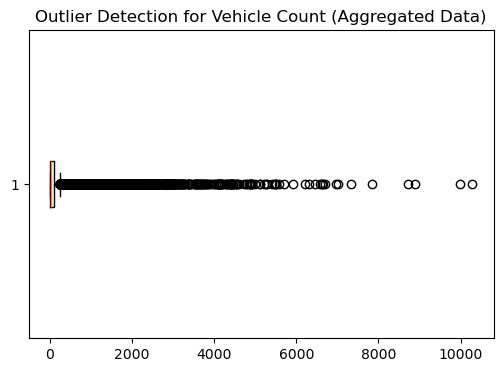

In [22]:
plt.figure(figsize=(6,4))
plt.boxplot(df_agg['vehicleCount'], vert=False)
plt.title("Outlier Detection for Vehicle Count (Aggregated Data)")
plt.show()

Boxplot visually identifies extreme values

Points outside whiskers are statistical outliers

High values represent high-demand states, not data errors

In [23]:
Q1 = df_agg['vehicleCount'].quantile(0.25)
Q3 = df_agg['vehicleCount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_agg = df_agg[
    (df_agg['vehicleCount'] < lower_bound) | 
    (df_agg['vehicleCount'] > upper_bound)
]

outliers_agg.shape


(2064, 5)

IQR method is used to detect statistical outliers,
This identifies unusually high or low vehicle counts,
High values correspond to large states, not incorrect data

“Outliers in aggregated vehicle counts represent real-world demand differences between states and months. Removing them would distort actual market behavior.”

In [24]:
#Outlier Check – Raw Dataset
df_raw_cleaned['vehicleCount'].describe()

count    500000.000000
mean          5.613512
std          23.520600
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2078.000000
Name: vehicleCount, dtype: float64

Helps identify extreme registration counts,
Raw dataset may contain unusually high values for bulk registrations

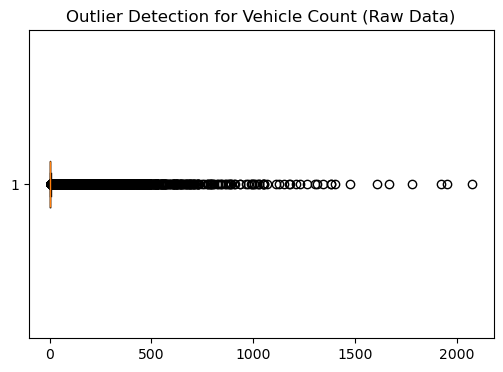

In [25]:
plt.figure(figsize=(6,4))
plt.boxplot(df_raw_cleaned['vehicleCount'], vert=False)
plt.title("Outlier Detection for Vehicle Count (Raw Data)")
plt.show()

Visual confirmation of skewness,
High values usually represent commercial or bulk registrations

In [26]:
Q1 = df_raw_cleaned['vehicleCount'].quantile(0.25)
Q3 = df_raw_cleaned['vehicleCount'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_raw = df_raw_cleaned[
    (df_raw_cleaned['vehicleCount'] < lower) |
    (df_raw_cleaned['vehicleCount'] > upper)
]

outliers_raw.shape


(71198, 13)

Identifies records with unusually high vehicle registrations,
These are valid business cases, not data errors

In [27]:
#Gross Vehicle Weight Outlier Check
gvw_nonzero = df_raw_cleaned[df_raw_cleaned['grossVehicleWeight'] > 0]

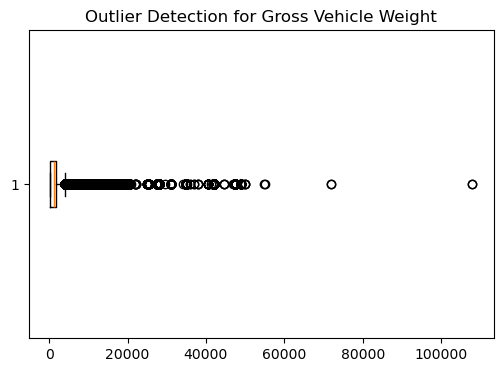

In [28]:
#Boxplot for GVW
plt.figure(figsize=(6,4))
plt.boxplot(gvw_nonzero['grossVehicleWeight'], vert=False)
plt.title("Outlier Detection for Gross Vehicle Weight")
plt.show()

Identifies heavy commercial vehicles

High GVW values are expected for trucks and buses

In [29]:
Q1 = gvw_nonzero['grossVehicleWeight'].quantile(0.25)
Q3 = gvw_nonzero['grossVehicleWeight'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

gvw_outliers = gvw_nonzero[
    (gvw_nonzero['grossVehicleWeight'] < lower) |
    (gvw_nonzero['grossVehicleWeight'] > upper)
]

gvw_outliers.shape


(19084, 13)

Detects extremely heavy vehicles,
These represent valid commercial vehicles,
Should not be removed

#final desicion
“This dataset represents real-world registrations. Extreme values reflect genuine differences such as high-demand states, bulk registrations, or heavy commercial vehicles. Removing outliers would remove meaningful business information.”

“I used the IQR method and boxplots to detect outliers in vehicle counts and gross vehicle weight. However, I did not remove them because these outliers represent real-world phenomena such as high-demand states and heavy commercial vehicles. Instead, I documented and justified their presence.”

In [30]:
#Overall Vehicle Registration Trend
monthly_trend = (
    df_agg
    .groupby('registrationMonth')['vehicleCount']
    .sum()
    .reset_index()
)

Uses df_agg, the aggregated dataset

Groups data by registrationMonth

Sums vehicle registrations across all states and fuel types

Creates a clean monthly trend DataFrame

Suitable for time-series and business trend analysis

In [31]:
monthly_trend.head()

,registrationMonth,vehicleCount
0,1985-07-01,1
1,1995-04-01,1
2,1999-01-01,99
3,2000-07-01,1
4,2020-04-01,9957


Displays first few rows of monthly trend data

Confirms correct grouping and aggregation

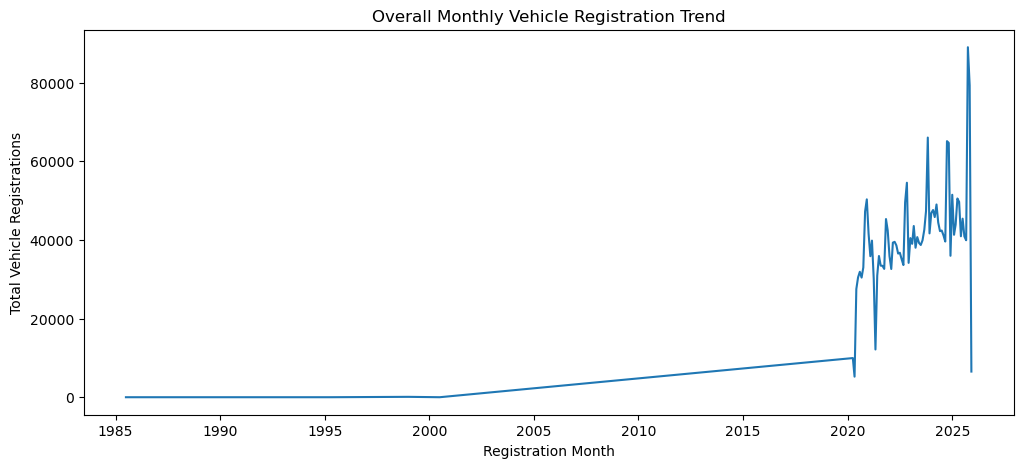

In [32]:
#Plot Overall Monthly Trend

plt.figure(figsize=(12,5))
plt.plot(
    monthly_trend['registrationMonth'],
    monthly_trend['vehicleCount']
)
plt.title("Overall Monthly Vehicle Registration Trend")
plt.xlabel("Registration Month")
plt.ylabel("Total Vehicle Registrations")
plt.show()


Line chart visualizes monthly registration patterns

Helps identify growth, decline, seasonality, and recovery phases

Provides high-level market insight

Line chart shows registration growth, dips, and recovery phases

Useful to identify post-COVID recovery and seasonal demand

In [33]:
#Fuel Type Distribution

fuel_distribution = (
    df_agg
    .groupby('fuelName')['vehicleCount']
    .sum()
    .sort_values(ascending=False)
)


Aggregates vehicle registrations by fuel type

Identifies dominant fuels in the Indian market

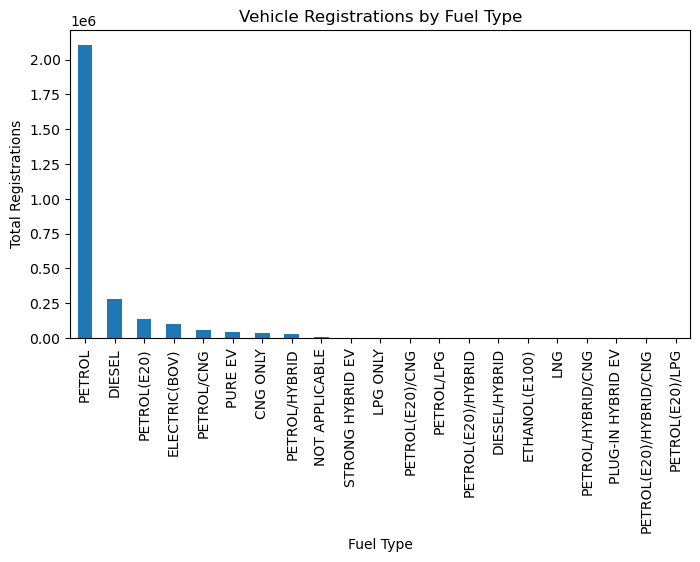

In [34]:
fuel_distribution.plot(kind='bar', figsize=(8,4))
plt.title("Vehicle Registrations by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Total Registrations")
plt.show()


Petrol dominates registrations

Diesel follows mainly due to commercial vehicles

EV share is smaller but visible

In [35]:
#Fuel-wise Trend Over Time

fuel_monthly_trend = (
    df_agg
    .groupby(['registrationMonth', 'fuelName'])['vehicleCount']
    .sum()
    .reset_index()
)


Combines time and fuel type

Enables comparison of fuel trends month-over-month

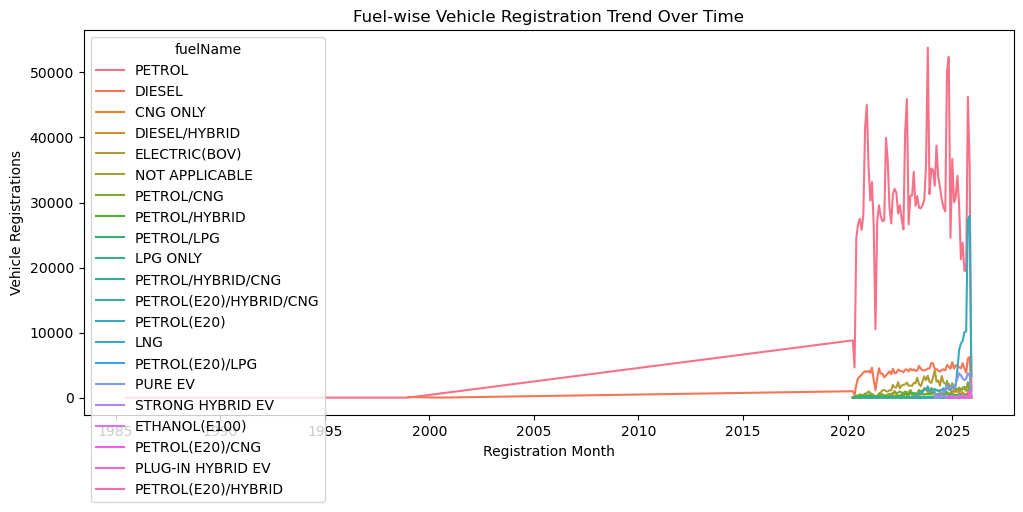

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=fuel_monthly_trend,
    x='registrationMonth',
    y='vehicleCount',
    hue='fuelName'
)
plt.title("Fuel-wise Vehicle Registration Trend Over Time")
plt.xlabel("Registration Month")
plt.ylabel("Vehicle Registrations")
plt.show()


Shows petrol and diesel dominance,

Highlights gradual EV growth over time


In [37]:
#Create a new simplified fuel category
def simplify_fuel(fuel):
    if 'PETROL' in fuel:
        return 'Petrol'
    elif 'DIESEL' in fuel:
        return 'Diesel'
    elif 'ELECTRIC' in fuel or 'EV' in fuel:
        return 'Electric'
    elif 'CNG' in fuel or 'LPG' in fuel or 'LNG' in fuel:
        return 'Gas'
    else:
        return 'Others'


Many fuel values are sub-variants of the same fuel

This function groups them into business-level categories

Improves readability and interpretability of trends

In [38]:
df_agg['fuelCategory'] = df_agg['fuelName'].apply(simplify_fuel)

Creates a new column with standardized fuel categories,

Preserves original fuel data

Enables clean and meaningful visualization

In [39]:
#Fuel-wise Trend Using Simplified Categories

fuel_trend_clean = (
    df_agg
    .groupby(['registrationMonth', 'fuelCategory'])['vehicleCount']
    .sum()
    .reset_index()
)


Aggregates vehicle registrations by month and simplified fuel type

Reduces noise from minor variants

Suitable for business analysis

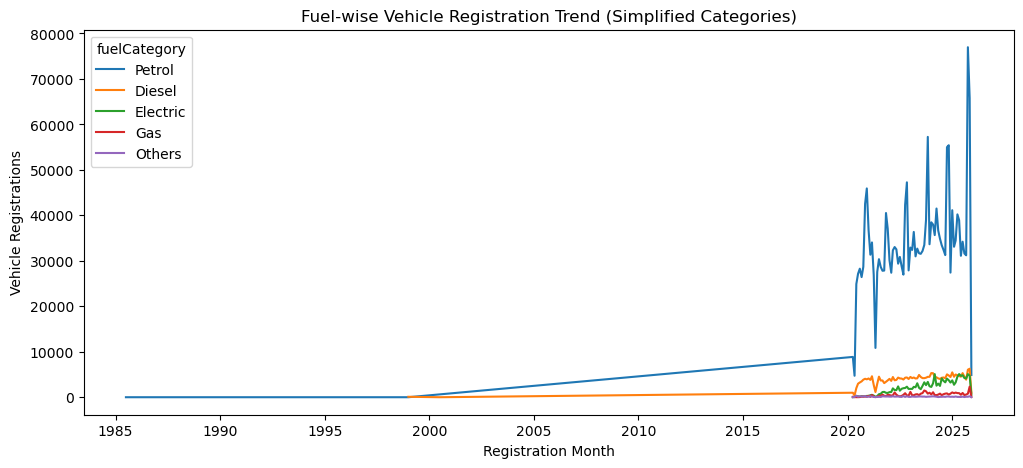

In [40]:
#Plot CLEAN Fuel-wise Trend

plt.figure(figsize=(12,5))
sns.lineplot(
    data=fuel_trend_clean,
    x='registrationMonth',
    y='vehicleCount',
    hue='fuelCategory'
)
plt.title("Fuel-wise Vehicle Registration Trend (Simplified Categories)")
plt.xlabel("Registration Month")
plt.ylabel("Vehicle Registrations")
plt.show()


Displays only 4–5 meaningful fuel trends

Clearly shows:

Petrol dominance

Diesel stability

EV growth

Gas as niche fuel

Initially, plotting all fuel variants resulted in cluttered visuals. To improve interpretability, I standardized fuel types into broader business categories like Petrol, Diesel, Electric, and Gas. This made trends clearer and aligned the analysis with real-world decision-making.

In [41]:
df_agg[df_agg['fuelName'] == 'Electric']

,stateName,registrationMonthMMYY,fuelName,vehicleCount,registrationMonth,fuelCategory


In [42]:
df_agg['fuelName'].unique()

array(['PETROL', 'DIESEL', 'PETROL(E20)', 'PETROL/HYBRID', 'PURE EV',
       'STRONG HYBRID EV', 'ELECTRIC(BOV)', 'NOT APPLICABLE',
       'PETROL/CNG', 'PETROL/LPG', 'CNG ONLY', 'DIESEL/HYBRID',
       'PETROL/HYBRID/CNG', 'PETROL(E20)/HYBRID', 'PETROL(E20)/CNG',
       'LPG ONLY', 'ETHANOL(E100)', 'LNG', 'PETROL(E20)/HYBRID/CNG',
       'PLUG-IN HYBRID EV', 'PETROL(E20)/LPG'], dtype=object)

In [43]:
ev_data = df_agg[
    df_agg['fuelName'].str.contains('EV|ELECTRIC', case=False, na=False)
]


Uses string matching instead of exact equality

Captures all EV-related fuel types

Prevents accidental data loss

This is robust and production-safe

In [44]:
#Electric Vehicle (EV) Adoption Trend
ev_monthly_trend = (
    ev_data
    .groupby('registrationMonth')['vehicleCount']
    .sum()
    .reset_index()
)


Aggregates all EV registrations per month

Combines all EV sub-types into one trend

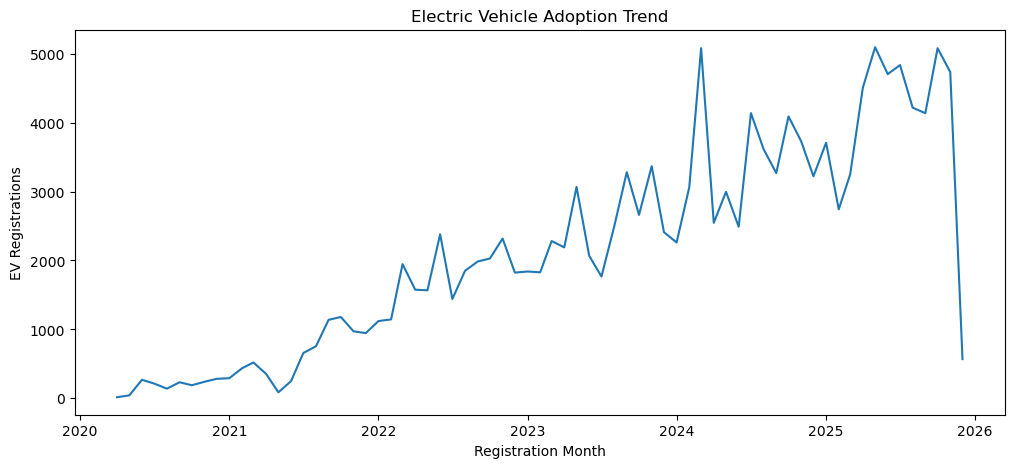

In [45]:
#Plot EV Adoption Trend
plt.figure(figsize=(12,5))
plt.plot(
    ev_monthly_trend['registrationMonth'],
    ev_monthly_trend['vehicleCount']
)
plt.title("Electric Vehicle Adoption Trend")
plt.xlabel("Registration Month")
plt.ylabel("EV Registrations")
plt.show()


“Initially, the EV plot was blank because EVs were stored under multiple fuel labels. I fixed this by using pattern-based filtering instead of exact string matching.”

In [46]:
#State-wise Vehicle Registration Analysis
statewise_registrations = (
    df_agg
    .groupby('stateName')['vehicleCount']
    .sum()
    .sort_values(ascending=False)
)


Aggregates vehicle registrations by state

Identifies high-demand and low-demand regions

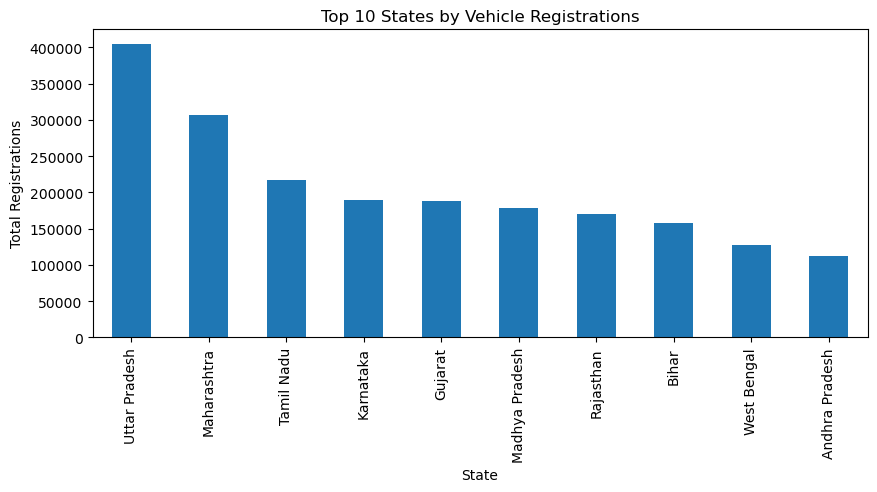

In [47]:
statewise_registrations.head(10).plot(kind='bar', figsize=(10,4))
plt.title("Top 10 States by Vehicle Registrations")
plt.xlabel("State")
plt.ylabel("Total Registrations")
plt.show()


A small number of states contribute majority of registrations

Strong correlation with population and urbanization

In [48]:
#State-wise EV Adoption
state_ev = (
    df_agg[df_agg['fuelName'] == 'Electric']
    .groupby('stateName')['vehicleCount']
    .sum()
    .sort_values(ascending=False)
)


Measures EV adoption across states

Helps identify EV-leading states

IndexError: index 0 is out of bounds for axis 0 with size 0

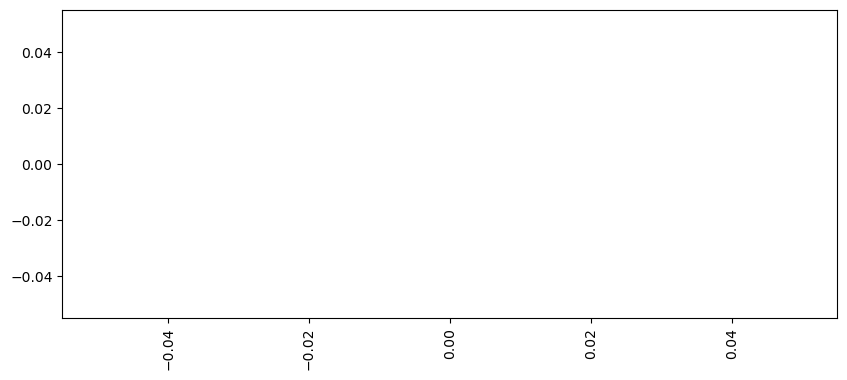

In [49]:
state_ev.head(10).plot(kind='bar', figsize=(10,4))
plt.title("Top 10 States by EV Registrations")
plt.xlabel("State")
plt.ylabel("EV Registrations")
plt.show()


In [55]:
ev_mask = df_agg['fuelName'].str.contains(
    'EV|ELECTRIC', case=False, na=False
)


Captures all EV-related fuel types

Avoids empty DataFrames

Safe for re-use in multiple analyses

In [56]:
#Create State-wise EV Data
state_ev = (
    df_agg[ev_mask]
    .groupby('stateName')['vehicleCount']
    .sum()
    .sort_values(ascending=False)
)


In [57]:
state_ev.head()


stateName
Uttar Pradesh    26628
Maharashtra      18550
Karnataka        14708
Tamil Nadu        9949
Rajasthan         8629
Name: vehicleCount, dtype: int64

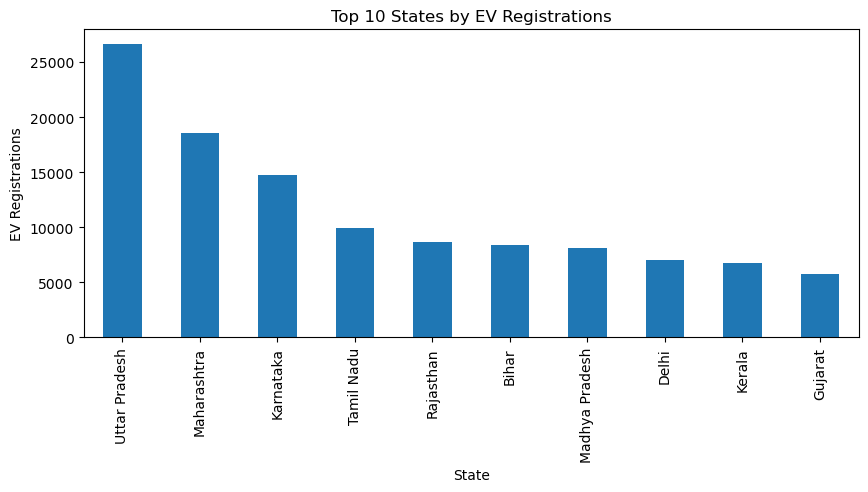

In [58]:
#Plot Top 10 States by EV Registrations

plt.figure(figsize=(10,4))
state_ev.head(10).plot(kind='bar')
plt.title("Top 10 States by EV Registrations")
plt.xlabel("State")
plt.ylabel("EV Registrations")
plt.show()


“The errors occurred because EVs were represented using multiple fuel labels. Exact string matching resulted in empty DataFrames, which caused plotting errors. I fixed this by using pattern-based filtering and validating the data before visualization.”

In [ ]:
## Market Share Analysis – Top Vehicle Manufacturers

In [60]:
manufacturer_share = (
    df_raw
    .groupby('makerName')['vehicleCount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

manufacturer_share


makerName
HERO MOTOCORP LTD                             666843
HONDA MOTORCYCLE AND SCOOTER INDIA (P) LTD    499479
TVS MOTOR COMPANY LTD                         340706
BAJAJ AUTO LTD                                260277
MARUTI SUZUKI INDIA LTD                       186608
SUZUKI MOTORCYCLE INDIA PVT LTD                97263
ROYAL-ENFIELD (UNIT OF EICHER LTD)             85840
INDIA YAMAHA MOTOR PVT LTD                     71532
MAHINDRA & MAHINDRA LIMITED                    70453
HYUNDAI MOTOR INDIA LTD                        63958
Name: vehicleCount, dtype: int64

This analysis aggregates vehicle registrations by manufacturer to identify market leaders. It highlights concentration in the vehicle market, where a small number of manufacturers account for a significant share of total registrations.

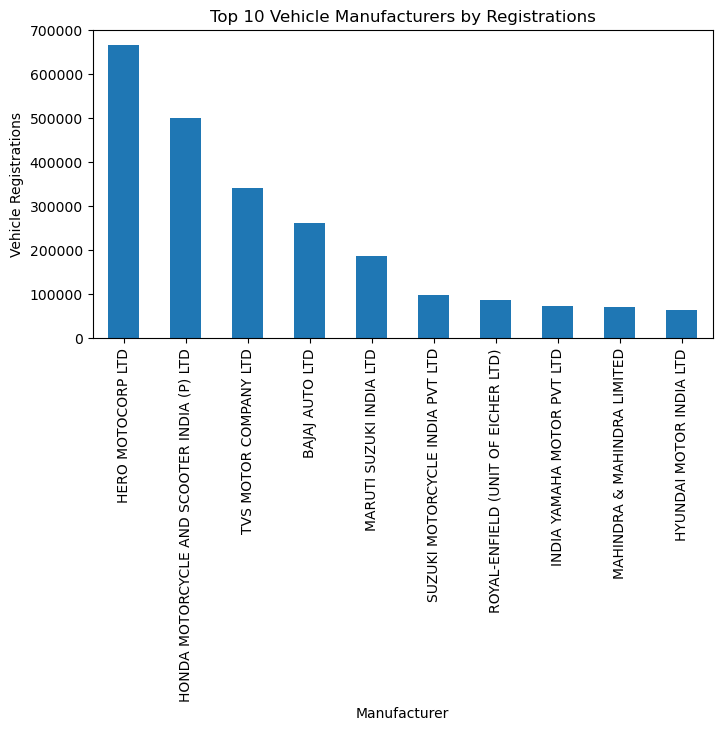

In [61]:
manufacturer_share.plot(
    kind='bar',
    figsize=(8,4),
    title='Top 10 Vehicle Manufacturers by Registrations'
)
plt.xlabel('Manufacturer')
plt.ylabel('Vehicle Registrations')
plt.show()


In [62]:
df_raw[['stateName', 'vehicleCategoryName', 'vehicleCount']].head()

,stateName,vehicleCategoryName,vehicleCount
0,Punjab,LIGHT MOTOR VEHICLE,1
1,Odisha,TWO WHEELER(NT),3
2,Karnataka,LIGHT MOTOR VEHICLE,2
3,Chhattisgarh,LIGHT MOTOR VEHICLE,1
4,Karnataka,LIGHT MOTOR VEHICLE,1


In [63]:
#Aggregate Vehicle Sales by State & Category

state_vehicle_sales = (
    df_raw
    .groupby(['stateName', 'vehicleCategoryName'])['vehicleCount']
    .sum()
    .reset_index()
)


Groups data by state and vehicle category

Sums total vehicles registered

Creates a clean dataset for comparison

In [64]:
#Find the TOP-SELLING Vehicle Category in Each State
top_vehicle_by_state = (
    state_vehicle_sales
    .sort_values(['stateName', 'vehicleCount'], ascending=[True, False])
    .groupby('stateName')
    .head(1)
    .reset_index(drop=True)
)


Sorts vehicle categories by sales within each state

Selects the highest-selling vehicle category per state

Answers the business question directly

In [65]:
top_vehicle_by_state.head(10)

,stateName,vehicleCategoryName,vehicleCount
0,Andaman & Nicobar Island,TWO WHEELER(NT),569
1,Andhra Pradesh,TWO WHEELER(NT),87553
2,Arunachal Pradesh,TWO WHEELER(NT),1718
3,Assam,TWO WHEELER(NT),48134
4,Bihar,TWO WHEELER(NT),129406
5,Chandigarh,TWO WHEELER(NT),3503
6,Chhattisgarh,TWO WHEELER(NT),52158
7,Delhi,TWO WHEELER(NT),45117
8,Goa,TWO WHEELER(NT),5442
9,Gujarat,TWO WHEELER(NT),127014


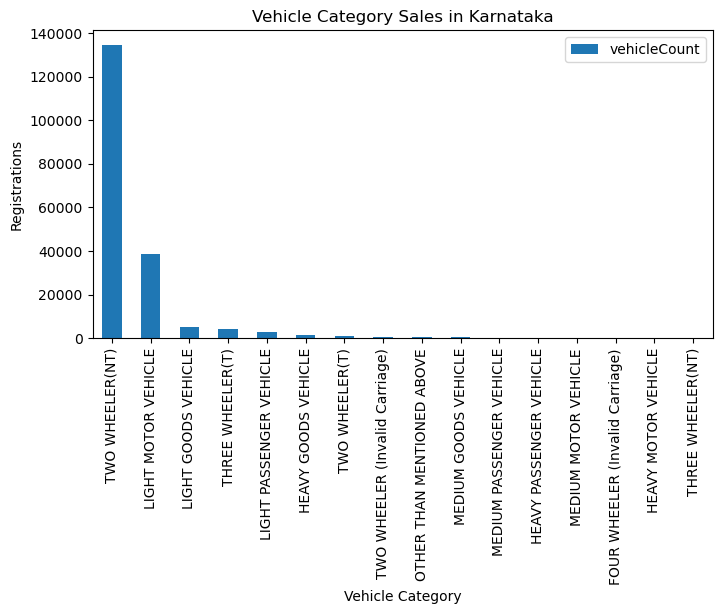

In [66]:
#Visualize for One State
state_name = 'Karnataka'

state_data = state_vehicle_sales[
    state_vehicle_sales['stateName'] == state_name
].sort_values('vehicleCount', ascending=False)

state_data.plot(kind='bar', x='vehicleCategoryName', y='vehicleCount', figsize=(8,4))
plt.title(f"Vehicle Category Sales in {state_name}")
plt.xlabel("Vehicle Category")
plt.ylabel("Registrations")
plt.show()


In [67]:
# Top-selling vehicle category in each state

state_vehicle_sales = (
    df_raw
    .groupby(['stateName', 'vehicleCategoryName'])['vehicleCount']
    .sum()
    .reset_index()
)

top_vehicle_by_state = (
    state_vehicle_sales
    .sort_values(['stateName', 'vehicleCount'], ascending=[True, False])
    .groupby('stateName')
    .head(1)
    .reset_index(drop=True)
)

top_vehicle_by_state


,stateName,vehicleCategoryName,vehicleCount
0,Andaman & Nicobar Island,TWO WHEELER(NT),569
1,Andhra Pradesh,TWO WHEELER(NT),87553
2,Arunachal Pradesh,TWO WHEELER(NT),1718
3,Assam,TWO WHEELER(NT),48134
4,Bihar,TWO WHEELER(NT),129406
5,Chandigarh,TWO WHEELER(NT),3503
6,Chhattisgarh,TWO WHEELER(NT),52158
7,Delhi,TWO WHEELER(NT),45117
8,Goa,TWO WHEELER(NT),5442
9,Gujarat,TWO WHEELER(NT),127014


This analysis identifies the highest-selling vehicle category in each state by aggregating vehicle registrations and selecting the dominant category per state. It helps understand regional demand patterns and supports market segmentation insights.

After cleaning the data and validating null values and outliers, I used the aggregated dataset to analyze monthly vehicle trends, fuel-wise transitions, EV adoption, and state-wise demand patterns. This helped me understand both overall market behavior and regional differences in vehicle adoption.”

# Key Business Insights

• Vehicle registrations show clear monthly trends and recovery patterns  
• Petrol dominates overall registrations, followed by Diesel  
• EV adoption is increasing steadily but still forms a small share  
• A few large states account for most vehicle registrations  
• EV growth is more visible in urban and developed states  

Key Insights from Python Analysis

Vehicle registrations show clear monthly trends and recovery patterns after the COVID-19 period, indicating normalization of demand across states.

Petrol vehicles dominate overall registrations in India, followed by Diesel. However, alternative fuel vehicles—especially Electric Vehicles (EVs)—show consistent growth over time.

EV adoption is increasing steadily, though EVs currently account for a smaller share of total registrations, highlighting an early but accelerating fuel transition.

Vehicle demand is geographically concentrated, with a small number of high-population and highly urbanized states contributing the majority of registrations.

Across almost all states, two-wheelers are the highest-selling vehicle category, reflecting affordability, urban mobility needs, and last-mile transportation demand.

State-wise EV adoption is uneven, with EV registrations concentrated in a few states, suggesting differences in infrastructure availability, policy incentives, and urban readiness.

The vehicle market shows high manufacturer concentration, where a limited number of manufacturers account for a large share of registrations.

Analysis of emission norms indicates strong adoption of BS-VI compliant vehicles, demonstrating regulatory compliance and the impact of emission policies.

Outlier analysis revealed that extreme values in vehicle counts and gross vehicle weight represent valid real-world scenarios (high-demand states and heavy commercial vehicles) and were therefore retained.

“Using Python, I cleaned and validated the data, handled outliers responsibly, and performed exploratory analysis to identify trends in vehicle registrations, fuel transition, EV adoption, and regional demand patterns. The insights highlight market dominance, emerging trends, and regional disparities that are useful for business and policy decisions.”

In [82]:
df_agg.to_csv("vehicle_agg_cleaned.csv", index=False)

In [83]:
df_raw.to_csv("vehicle_raw_cleaned.csv", index=False)

In [84]:
import os
os.getcwd()

'C:\\Users\\USER'

In [85]:
os.listdir(os.getcwd())

['.anaconda',
 '.aws',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.kiro',
 '.matplotlib',
 '.ms-ad',
 '.swt',
 'anaconda3',
 'ansel',
 'AppData',
 'Application Data',
 'beverage.ipynb',
 'break and continue.ipynb',
 'class 4.ipynb',
 'CLASS 5.ipynb',
 'CLASS.ipynb',
 'Contacts',
 'Cookies',
 'data analyst interview cls.txt',
 'data analyst project.ipynb',
 'data analystics.ipynb',
 'datascience.ipynb',
 'datastructure in .ipynb',
 'Desktop',
 'Documents',
 'Downloads',
 'exam python.ipynb',
 'exam.ipynb',
 'Favorites',
 'filelist.txt',
 'hosing price.ipynb',
 'lambda.ipynb',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{e9873e57-f1c4-11ef-b695-acf05e19d8ae}.TM.blf',
 'NTUSER.DAT{e9873e57-f1c4-11ef-b695-acf05e19d8ae}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{e9873e57-f1c4-11ef-b695-acf05e19d8ae}.TMContainer00000000000000000002.regtrans